### Modelo_dos. ( Mejorando modelo 0.1 )   Normalizado & Desbalanceado

    - Gestionamos el Desbalanceo del target - Seguro de Hogar



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

In [9]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/cleanned_data/df.tfm')

In [11]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


### Primero normalizamos

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
df_datos_numericos = data = df.select_dtypes('number')

In [181]:
modelo1.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0])

In [21]:
columnas_datos_numericos = df_datos_numericos.columns

In [22]:
df_normalizado = scaler.fit_transform(df_datos_numericos)

In [23]:
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [24]:
df_normalizado.head(2)

,cliente,saldo_captacion,gestor,codigo_cartera,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,edad,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,0.000000,0.258207,0.316956,0.140366,0.001689,0.415566,0.031101,1.0,1.0,1.0,1.0,1.0,0.584746,0.1,0.098619,0.0,0.0,0.0,1.0,0.0
1,0.000002,0.223408,0.316956,0.140366,0.001689,0.355362,0.000000,0.0,0.0,0.0,1.0,1.0,0.686441,0.1,0.098619,0.0,0.0,0.0,0.0,0.0


### Vemos como de desbalanceado esta el target

In [16]:
# vemos como esta de desbalanceada la clase_hogar
print(df.shape)
clase_hogar = pd.value_counts(df['lp_seg_hogar'], sort = True, normalize = True)
print (clase_hogar)

(451374, 30)
0    0.869707
1    0.130293
Name: lp_seg_hogar, dtype: float64


% clientes que tienen seguro hogar =  0.13029328228918813


Text(0.5, 0, 'Seguro Hogar')

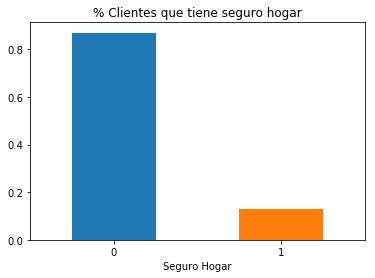

In [17]:
# Ploteamos el desbalanceo de la variable Target para una mejor visualizacion
clase_hogar.plot(kind = 'bar', rot = 0)
porcentaje_con_hogar = clase_hogar[1]
print ('% clientes que tienen seguro hogar = ', porcentaje_con_hogar)
plt.title("% Clientes que tiene seguro hogar")
plt.xlabel('Seguro Hogar')

### Opciones para el desbalanceo :

    - Parametro weigth = 'balanced'   
    - Subsampling en la clase mayoritaria
    - Reducir data set
    - Agregar de forma artifical datos de 1
    

In [ ]:
# Asignamo Inputs y Target sobre df.normalizado
X = df_normalizado.drop(['lp_seg_hogar'], axis = 1)
y= df_normalizado['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

In [28]:
# PRIMERA OPCION DE DESBALANCEO - Utilizo class_weight='balanced'
modelo2 = LogisticRegression(solver='newton-cg', class_weight='balanced')

In [30]:
modelo2.fit(X,y)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [31]:
modelo2.predict(X)

array([1., 1., 1., ..., 0., 0., 0.])

In [32]:
# recordar porque he utilizado seed en random_state
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [33]:
modelo2.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [34]:
modelo2.predict(X_test)

array([0., 1., 1., ..., 1., 1., 0.])

In [36]:
modelo2.predict_proba(X_test)[:, 1]

array([0.4459901 , 0.55091818, 0.59620663, ..., 0.59169363, 0.9011322 ,
       0.48479047])

In [37]:
#importamos librerias
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


[[52411 26079]
 [ 2846  8939]]


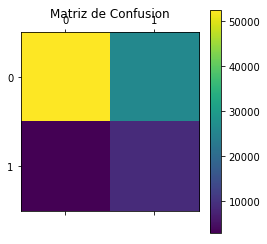

In [39]:
# Imprimimos matriz de confusion para ver los datos iniciales y luego sacar las metricas
matriz_confusion_modelo2 = confusion_matrix(y_test,modelo2.predict(X_test))
print(matriz_confusion_modelo2)
pl.matshow(confusion_matrix(y_test,modelo2.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [40]:
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,modelo2.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,modelo2.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,modelo2.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,modelo2.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,modelo2.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, modelo2.predict(X_test)))

accuracy_score =  0.679590141235115
precision = 0.2552687189445428
recall = 0.7585065761561307
f1_score = 0.3819840608508001
roc_auc_score = 0.7830618181216711
classification_report
              precision    recall  f1-score   support

         0.0       0.95      0.67      0.78     78490
         1.0       0.26      0.76      0.38     11785

    accuracy                           0.68     90275
   macro avg       0.60      0.71      0.58     90275
weighted avg       0.86      0.68      0.73     90275

